In [1]:
#Please reload if changes are made to the functions
%run Common.ipynb

2023-08-01 09:54:36.632283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train,x_test,y_train,y_test = get_data("AAPL","2010-01-01")

[*********************100%***********************]  1 of 1 completed
(2724, 10, 2) (682, 10, 2) (2724, 2) (682, 2)


In [3]:
model_config = base_model_config()


## 2.2 Epoch and Batch Sizes

In [5]:
#Initialize the measures
accuracy_measures = {}

for batch_size in range(16,128,16):
    if 16 == 16:
        #Load default configuration
        model_config = base_model_config()
        #Acquire and process input data
        #X,Y = get_data()

        #set epoch to 20
        model_config["EPOCHS"]=20
        #Set batch size to experiment value
        model_config["BATCH_SIZE"] = batch_size
        model_name = "Batch-Size-" + str(batch_size)
        history = create_and_run_model(model_config,x_train,y_train,model_name,x_test,x_train)
        accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Batch-Size-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                672       
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 2)                 130       
                                                                 
Total params: 3042 (11.88 KB)
Trainable params: 2978 (11.63 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________

*************************

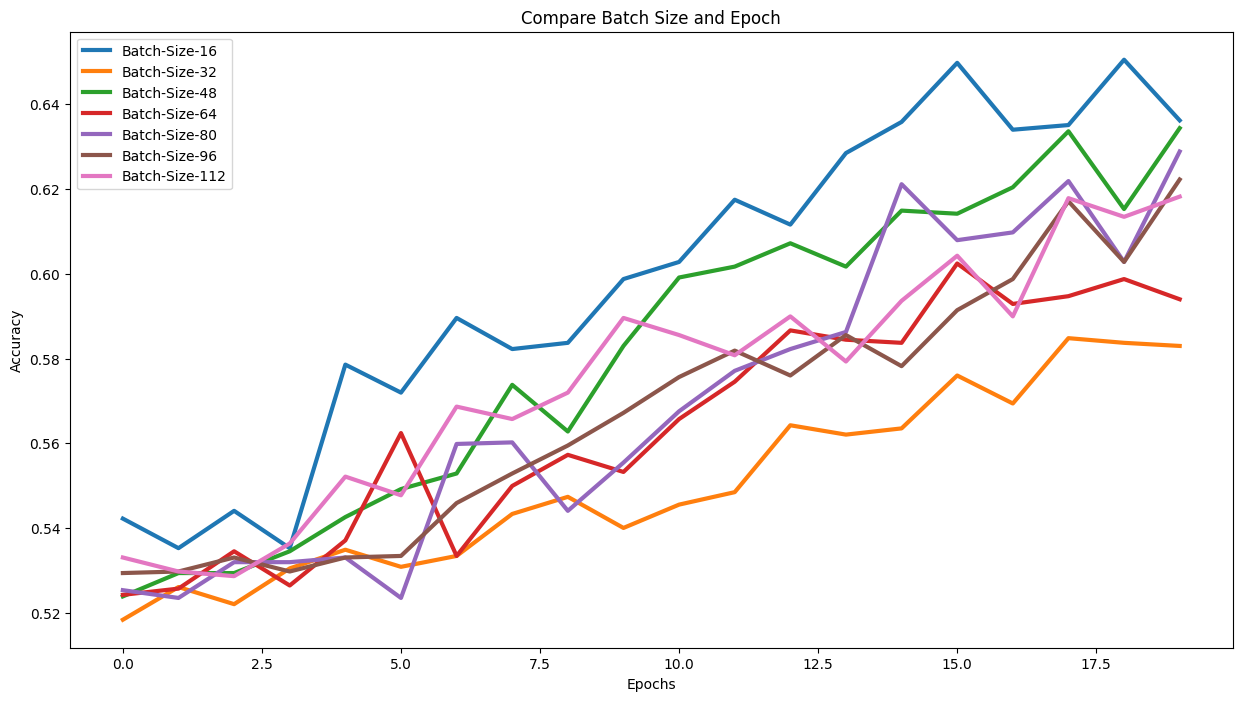

In [6]:
plot_graph(accuracy_measures, "Compare Batch Size and Epoch")

## 2.3. Layers in a Network

In [7]:
accuracy_measures = {}
layer_list =[]
for layer_count in range(1,6):
    
    #32 nodes in each layer
    layer_list.append(32)
    
    model_config = base_model_config()
    #X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Layers-" + str(layer_count)
    #history=create_and_run_model(model_config,X,Y,model_name)
    history = create_and_run_model(model_config,x_train,y_train,model_name,x_test,x_train)

    accuracy_measures[model_name] = history.history["accuracy"]




******************************************************
Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                672       
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 738 (2.88 KB)
Trainable params: 738 (2.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

******************************************************
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                672       
                                                                 
 batch_normalization_8 (Bat  (

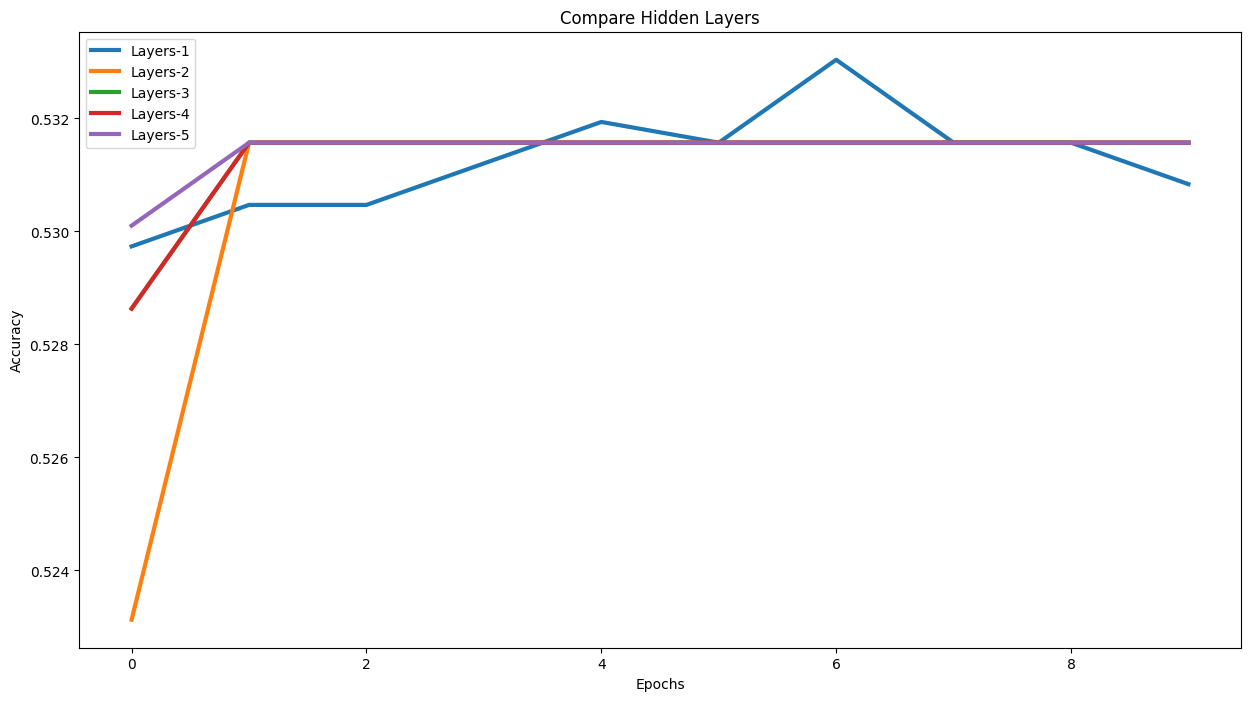

In [8]:
plot_graph(accuracy_measures, "Compare Hidden Layers")

## 2.4 Nodes in a Layer

In [8]:
accuracy_measures = {}

for node_count in range(8,40,8):
    
    #have 2 hidden layers in the networks
    layer_list =[]
    for layer_count in range(2):
        layer_list.append(node_count)
    
    model_config = base_model_config()
    #X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count)
    #history=create_and_run_model(model_config,X,Y, model_name)
    history = create_and_run_model(model_config,x_train,y_train,model_name,x_test,x_train)

    accuracy_measures[model_name] = history.history["accuracy"]



******************************************************
Model: "Nodes-8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 8)                 168       
                                                                 
 batch_normalization_18 (Ba  (None, 8)                 32        
 tchNormalization)                                               
                                                                 
 Dense-Layer-1 (Dense)       (None, 8)                 72        
                                                                 
 Output-Layer (Dense)        (None, 2)                 18        
                                                                 
Total params: 290 (1.13 KB)
Trainable params: 274 (1.07 KB)
Non-trainable params: 16 (64.00 Byte)
_________________________________________________________________

************************************

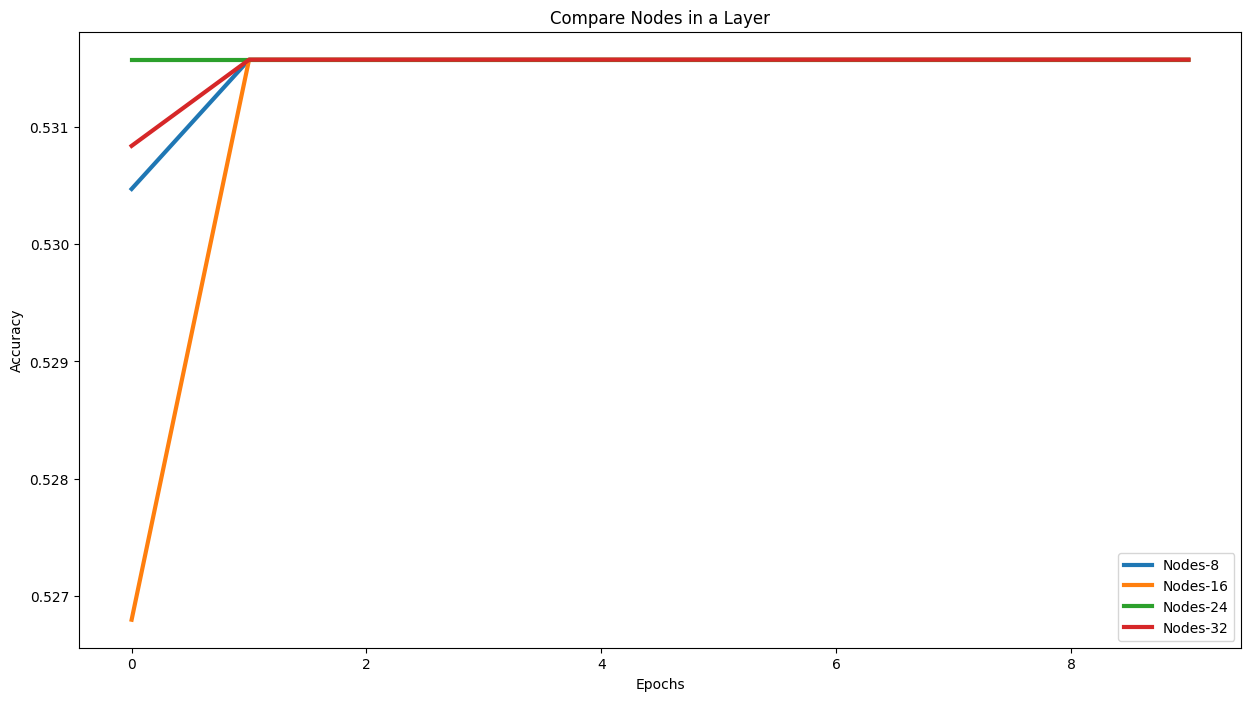

In [10]:
plot_graph(accuracy_measures, "Compare Nodes in a Layer")

## 2.5 Choosing Activation Functions

In [11]:
accuracy_measures = {}

activation_list = ['relu','sigmoid','tanh']

for activation in activation_list:
    
    model_config = base_model_config()
   # X,Y = get_data()
    
    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    #history=create_and_run_model(model_config,X,Y,model_name)
    history = create_and_run_model(model_config,x_train,y_train,model_name,x_test,x_train)

    accuracy_measures["Model-" + activation] = history.history["accuracy"]



******************************************************
Model: "Model-relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                672       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 2)                 130       
                                                                 
Total params: 2914 (11.38 KB)
Trainable params: 2914 (11.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

******************************************************
Model: "Model-sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Den

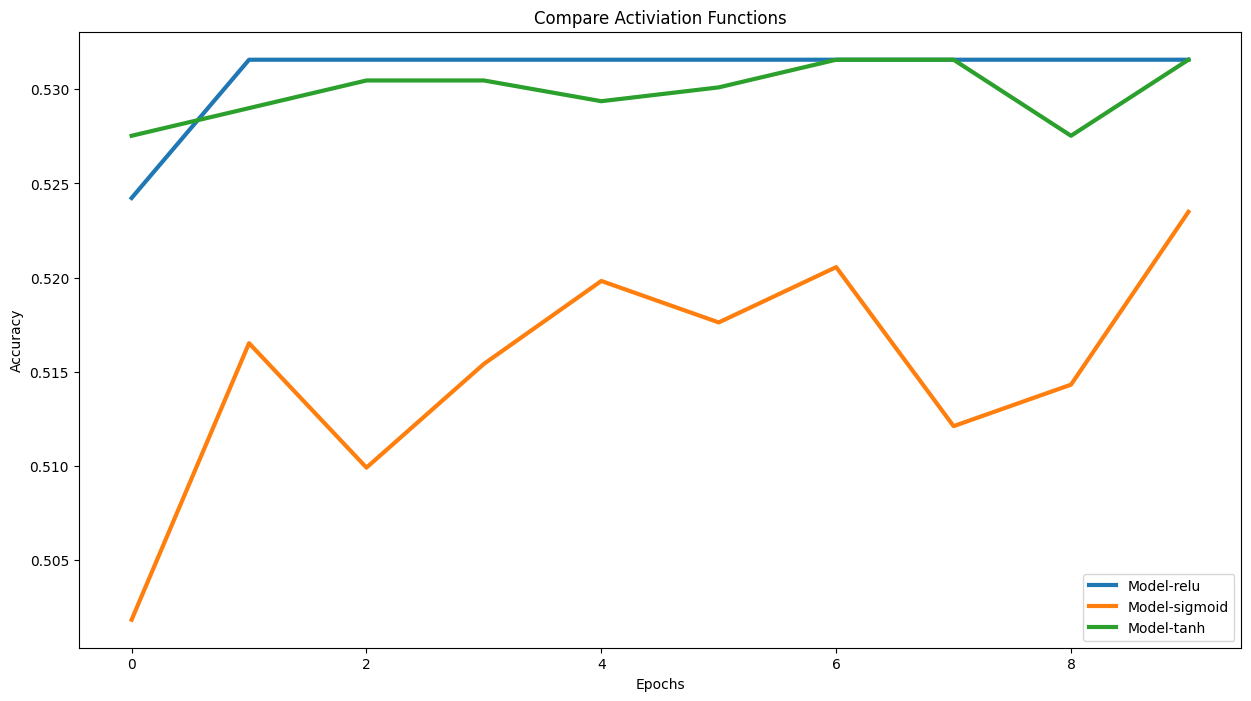

In [12]:
plot_graph(accuracy_measures, "Compare Activiation Functions")

## 2.6. Weights Initialization

In [13]:
accuracy_measures = {}

initializer_list = ['random_normal','zeros','ones',"random_uniform"]
for initializer in initializer_list:
    
    model_config = base_model_config()
   # X,Y = get_data()
    
    model_config["WEIGHTS_INITIALIZER"] = initializer
    model_name = "Model-" + initializer
    history = create_and_run_model(model_config,x_train,y_train,model_name,x_test,x_train)
    
    accuracy_measures[model_name] = history.history["accuracy"]





******************************************************
Model: "Model-random_normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                672       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 2)                 130       
                                                                 
Total params: 2914 (11.38 KB)
Trainable params: 2914 (11.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

******************************************************
Model: "Model-zeros"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer

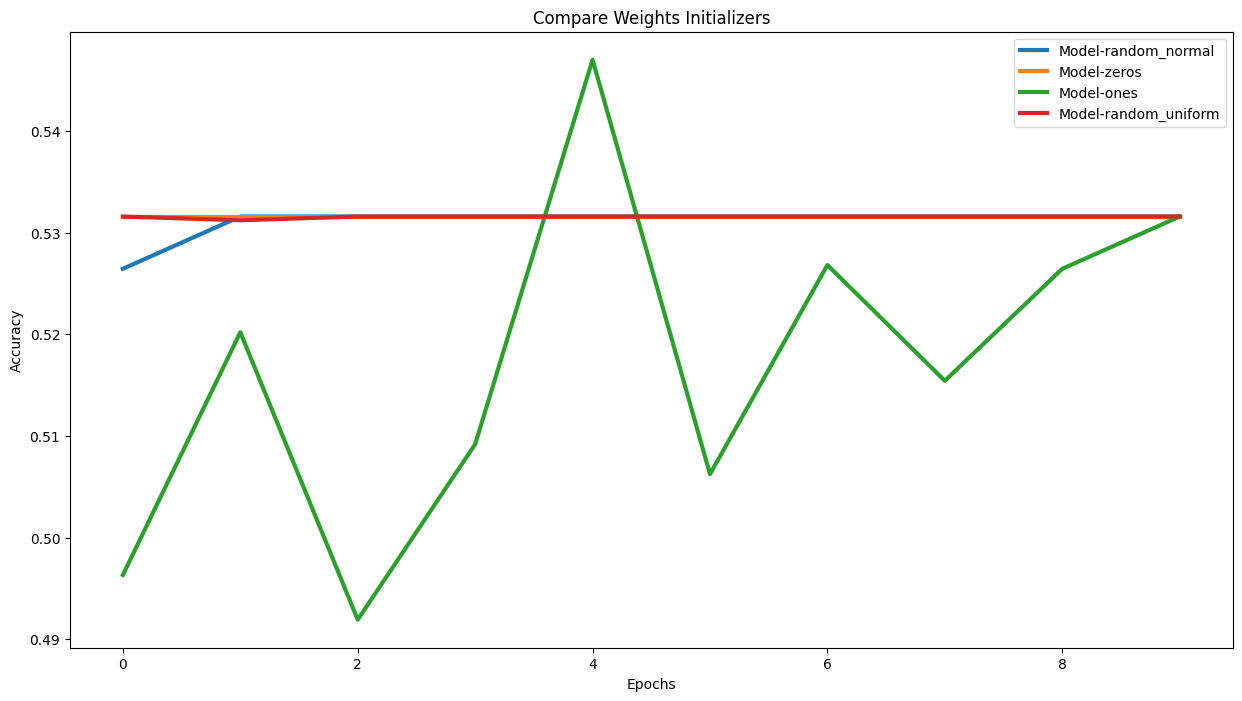

In [14]:
plot_graph(accuracy_measures, "Compare Weights Initializers")